In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pandas/Data_Sets/dropout-ratio-2012-2015.csv')
df

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,NR,NR,NR
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [ ]:
x = df.replace("NR",0)
x

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,0,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,0,0,0
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [ ]:
y = x.replace({"Upper Primary_Boys":"Uppe_r_Primary"},0)
y

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,0,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,0,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,0,0,0
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [ ]:
y["State_UT"].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal  Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya  Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil  Nadu', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'All India'], dtype=object)

In [ ]:
z = y.replace({"State_UT":"Arunachal  Pradesh"},"Arunachal Pradesh")

In [ ]:
z = z.replace({"State_UT":"Tamil  Nadu"},"Tamil Nadu")

In [ ]:
z = z.replace({"State_UT":"Madhya  Pradesh"},"Madhya Pradesh")
z

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,0,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,0,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,0,0,0
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [ ]:
def Year(g):
  if g["year"] == "2012-13":
    return "Thirteen"
  elif g["year"] == "2013-14":
    return "Fourteen"
  else:
    return "Fifteen"

In [ ]:
z["Yr"] = z.apply(Year,axis = 1)

In [ ]:
new = z.drop(columns = ["year"])
new

,State_UT,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,Yr
0,A & N Islands,0.83,0.51,0.68,0,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,Thirteen
1,A & N Islands,1.35,1.06,1.21,0,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87,Fourteen
2,A & N Islands,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,Fifteen
3,Andhra Pradesh,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0,0.35,Thirteen
4,Andhra Pradesh,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,Fourteen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9,Fourteen
106,West Bengal,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11,Fifteen
107,All India,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,0,0,0,Thirteen
108,All India,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54,Fourteen


In [ ]:
new = new.astype({'Primary_Boys':'float64', 'Primary_Girls':'float64', 'Primary_Total':'float64',
       'Upper Primary_Boys':'float64', 'Upper Primary_Girls':'float64', 'Upper Primary_Total':'float64',
       'Secondary _Boys':'float64', 'Secondary _Girls':'float64', 'Secondary _Total':'float64',
       'HrSecondary_Boys':'float64', 'HrSecondary_Girls':'float64', 'HrSecondary_Total':'float64'})

In [ ]:
new.dtypes 

State_UT                object
Primary_Boys           float64
Primary_Girls          float64
Primary_Total          float64
Upper Primary_Boys     float64
Upper Primary_Girls    float64
Upper Primary_Total    float64
Secondary _Boys        float64
Secondary _Girls       float64
Secondary _Total       float64
HrSecondary_Boys       float64
HrSecondary_Girls      float64
HrSecondary_Total      float64
Yr                      object
dtype: object

In [ ]:
new = new.drop([107,108,109],axis = 0)

In [ ]:
new["State_UT"].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [ ]:
def States(h):
  if h['State_UT'] == 'A & N Islands':
    return 'AN'
  elif h['State_UT'] == 'Andhra Pradesh':
    return 'AP'
  elif h['State_UT'] == 'Arunachal Pradesh':
    return 'AR'
  elif h['State_UT'] == 'Assam':
    return 'AS'
  elif h['State_UT'] == 'Bihar':
    return 'BR'
  elif h['State_UT'] == 'Chandigarh':
    return 'CH'
  elif h['State_UT'] ==  'Chhattisgarh':
    return 'CG'
  elif h['State_UT'] ==  'Dadra & Nagar Haveli':
    return 'DN'
  elif h['State_UT'] == 'Daman & Diu':
    return 'DD'
  elif h['State_UT'] == 'Delhi':
    return 'DL'
  elif h['State_UT'] ==  'Goa':
    return 'GA'
  elif h['State_UT'] ==  'Gujarat':
    return 'GJ'
  elif h['State_UT'] == 'Haryana':
    return 'HR'
  elif h['State_UT'] ==  'Himachal Pradesh':
    return 'HP'
  elif h['State_UT'] == 'Jammu & Kashmir':
    return 'JK'
  elif h['State_UT'] ==  'Jharkhand':
    return 'JH'
  elif h['State_UT'] ==  'Karnataka':
    return 'KA'
  elif h['State_UT'] == 'Kerala':
    return 'KL' 
  elif h['State_UT'] == 'Lakshadweep':
    return 'LD'
  elif h['State_UT'] == 'Madhya Pradesh':
    return 'MP'
  elif h['State_UT'] == 'Maharashtra':
    return 'MH'
  elif h['State_UT'] == 'Manipur':
    return 'MN'
  elif h['State_UT'] == 'Meghalaya':
    return 'ML'
  elif h['State_UT'] == 'Mizoram':
    return 'MZ' 
  elif h['State_UT'] == 'Nagaland':
    return 'NL'
  elif h['State_UT'] == 'Odisha':
    return 'OD' 
  elif h['State_UT'] == 'Puducherry':
    return 'PY'
  elif h['State_UT'] ==  'Punjab':
    return 'PB'
  elif h['State_UT'] == 'Rajasthan':
    return 'RJ'
  elif h['State_UT'] ==  'Sikkim':
    return 'SK'
  elif h['State_UT'] == 'Tamil Nadu':
    return 'TN'
  elif h['State_UT'] == 'Telangana':
    return 'TS' 
  elif h['State_UT'] == 'Tripura':
    return 'TR'
  elif h['State_UT'] == 'Uttar Pradesh':
    return 'UP'
  elif h['State_UT'] == 'Uttarakhand':
    return 'UK'
  elif h['State_UT'] == 'West Bengal':
    return 'WB'

In [ ]:
new["State"] = new.apply(States,axis = 1)

In [ ]:
new = new.drop(["State_UT"],axis = 1)
new

,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,Yr,State
0,0.83,0.51,0.68,0.00,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14,Thirteen,AN
1,1.35,1.06,1.21,0.00,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87,Fourteen,AN
2,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93,Fifteen,AN
3,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0.00,0.35,Thirteen,AP
4,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79,Fourteen,AP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,3.28,2.83,3.07,1.78,1.57,1.68,9.85,7.44,8.70,0.23,0.00,0.00,Fourteen,UK
103,4.37,3.67,4.04,0.79,1.62,1.19,11.26,9.46,10.40,3.40,2.61,3.01,Fifteen,UK
104,6.88,5.71,6.30,6.29,4.16,5.18,14.95,19.41,17.30,7.81,8.49,8.13,Thirteen,WB
105,3.44,2.37,2.91,5.63,3.10,4.31,16.73,19.77,18.34,8.03,7.76,7.90,Fourteen,WB


In [ ]:
def Year(g):
  if g["year"] == "2012-13":
    return "Thirteen"
  elif g["year"] == "2013-14":
    return "Fourteen"
  else:
    return "Fifteen"

In [ ]:
z["Yr"] = z.apply(Year,axis = 1)

In [ ]:
new.columns

Index(['Primary_Boys', 'Primary_Girls', 'Primary_Total', 'Upper Primary_Boys',
       'Upper Primary_Girls', 'Upper Primary_Total', 'Secondary _Boys',
       'Secondary _Girls', 'Secondary _Total', 'HrSecondary_Boys',
       'HrSecondary_Girls', 'HrSecondary_Total', 'Yr', 'State'],
      dtype='object')

In [ ]:
new['Primary_Total'] =  new[['Primary_Boys', 'Primary_Girls']].mean(axis=1)

In [ ]:
new['Upper Primary_Total'] = new[['Upper Primary_Boys','Upper Primary_Girls']].mean(axis=1)

In [ ]:
new['Secondary _Total'] = new[['Secondary _Boys','Secondary _Girls']].mean(axis=1)

In [ ]:
new['HrSecondary_Total'] = new[['HrSecondary_Boys','HrSecondary_Girls']].mean(axis=1)

In [ ]:
new 

,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,Yr,State
0,0.83,0.51,0.670,0.00,1.09,0.545,5.57,5.55,5.560,17.66,10.15,13.905,Thirteen,AN
1,1.35,1.06,1.205,0.00,1.54,0.770,8.36,5.98,7.170,18.94,12.20,15.570,Fourteen,AN
2,0.47,0.55,0.510,1.44,1.95,1.695,11.47,8.16,9.815,21.05,12.21,16.630,Fifteen,AN
3,3.30,3.05,3.175,3.21,3.51,3.360,12.21,13.25,12.730,2.66,0.00,1.330,Thirteen,AP
4,4.31,4.39,4.350,3.46,4.12,3.790,11.95,13.37,12.660,12.65,10.85,11.750,Fourteen,AP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,3.28,2.83,3.055,1.78,1.57,1.675,9.85,7.44,8.645,0.23,0.00,0.115,Fourteen,UK
103,4.37,3.67,4.020,0.79,1.62,1.205,11.26,9.46,10.360,3.40,2.61,3.005,Fifteen,UK
104,6.88,5.71,6.295,6.29,4.16,5.225,14.95,19.41,17.180,7.81,8.49,8.150,Thirteen,WB
105,3.44,2.37,2.905,5.63,3.10,4.365,16.73,19.77,18.250,8.03,7.76,7.895,Fourteen,WB


In [ ]:
th = new[new["Yr"] == "Thirteen"]
th

,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total,Yr,State
0,0.83,0.51,0.670,0.00,1.09,0.545,5.57,5.55,5.560,17.66,10.15,13.905,Thirteen,AN
3,3.30,3.05,3.175,3.21,3.51,3.360,12.21,13.25,12.730,2.66,0.00,1.330,Thirteen,AP
7,15.84,14.44,15.140,5.86,9.06,7.460,13.99,11.77,12.880,7.85,2.14,4.995,Thirteen,AR
9,7.02,5.46,6.240,7.89,6.55,7.220,25.65,27.79,26.720,4.87,4.50,4.685,Thirteen,AS
12,0.00,0.00,0.000,0.00,0.00,0.000,29.11,31.28,30.195,0.00,0.00,0.000,Thirteen,BR
15,0.00,0.00,0.000,0.00,0.88,0.440,0.00,0.00,0.000,16.32,10.09,13.205,Thirteen,CH
18,4.24,4.05,4.145,6.09,4.73,5.410,14.82,14.89,14.855,0.00,0.00,0.000,Thirteen,CG
21,0.00,0.47,0.235,2.59,4.30,3.445,26.34,22.00,24.170,13.34,4.81,9.075,Thirteen,DN
24,0.00,0.00,0.000,0.00,0.00,0.000,10.84,12.25,11.545,6.21,0.00,3.105,Thirteen,DD
27,0.00,0.00,0.000,0.00,0.31,0.155,6.26,4.21,5.235,18.56,9.60,14.080,Thirteen,DL


In [ ]:
thp = th[['State','Primary_Boys','Primary_Girls','Primary_Total']]
thp

,State,Primary_Boys,Primary_Girls,Primary_Total
0,AN,0.83,0.51,0.670
3,AP,3.30,3.05,3.175
7,AR,15.84,14.44,15.140
9,AS,7.02,5.46,6.240
12,BR,0.00,0.00,0.000
15,CH,0.00,0.00,0.000
18,CG,4.24,4.05,4.145
21,DN,0.00,0.47,0.235
24,DD,0.00,0.00,0.000
27,DL,0.00,0.00,0.000


In [ ]:
thp = thp.sort_values(by=('Primary_Total'),ascending = False)
thp

,State,Primary_Boys,Primary_Girls,Primary_Total
69,MZ,24.27,23.93,24.100
7,AR,15.84,14.44,15.140
98,UP,10.53,10.03,10.280
66,ML,11.32,8.96,10.140
63,MN,10.24,9.48,9.860
84,RJ,7.20,8.85,8.025
45,JH,7.36,7.05,7.205
72,NL,7.11,7.03,7.070
104,WB,6.88,5.71,6.295
42,JK,6.80,5.75,6.275


In [ ]:
thpu = thpu.drop([27,24,15,12,51])
thpu

NameError: ignored

In [ ]:
thp1 = thp.head(6)
thp2 = thp.tail(6)
thpT = [thp1,thp2]
thpu = pd.concat(thpT)

In [ ]:
#13Primary 
sns.barplot(x='State', y='Primary_Total', data=thpu)
plt.title("2012-13 Primary")

In [ ]:
thup = th[["State","Upper Primary_Boys","Upper Primary_Girls","Upper Primary_Total"]]
thup

In [ ]:
thup = thup.sort_values(by = ("Upper Primary_Total"),ascending = False)
thup

In [ ]:
thup = thup.drop([30,24,12,51])

In [ ]:
up1 = thup.head(6)
up2 = thup.tail(6)
upT = [up1,up2]
thupu = pd.concat(upT)
thupu

In [ ]:
sns.barplot(x='State', y='Upper Primary_Total', data=thupu)
plt.title("2012-13 Upper Primary")

In [ ]:
ths = th[["State","Secondary _Boys","Secondary _Girls","Secondary _Total"]]
ths

In [ ]:
ths = ths.sort_values(by = ("Secondary _Total"), ascending = False)
ths

In [ ]:
ths = ths.drop([98,15])

In [ ]:
ths1 = ths.head(6)
ths2 = ths.tail(6)
thsT = [ths1,ths2]
thsu = pd.concat(thsT)

In [ ]:
sns.barplot(x='State', y='Secondary _Total', data=thsu)
plt.title("2012-13 Secondary")

In [ ]:
thhs = th[["State","HrSecondary_Boys","HrSecondary_Girls","HrSecondary_Total"]]
thhs

In [ ]:
thhs = thhs.sort_values(by = ("HrSecondary_Total"),ascending = False)
thhs

In [ ]:
thhs = thhs.drop([98,84,36,75,12,66,57,18,45,51])

In [ ]:
thhs1 = thhs.head(6)
thhs2 = thhs.tail(6)
thhsT = [thhs1,thhs2]
thhsu = pd.concat(thhsT)
thhsu

In [ ]:
sns.barplot(x='State', y='HrSecondary_Total', data=thhsu)
plt.title("2012-13 Hr Secondary")

In [ ]:
fr = new[new["Yr"] == "Fourteen"]
fr

In [ ]:
frp = fr[['State','Primary_Boys','Primary_Girls','Primary_Total']]
frp

In [ ]:
frp = frp.sort_values(by=('Primary_Total'),ascending = False)
frp

In [ ]:
frp = frp.drop([52,28,16,55])

In [ ]:
frp1 = frp.head(6)
frp2 = frp.tail(6)
frpuT = [frp1,frp2]
frpu = pd.concat(frpuT)
frpu

In [ ]:
sns.barplot(x='State', y='Primary_Total', data=frpu)
plt.title("2013-14 Primary")

In [ ]:
frup = fr[['State','Upper Primary_Boys','Upper Primary_Girls', 'Upper Primary_Total']]
frup

In [ ]:
frup = frup.sort_values(by=('Upper Primary_Total'),ascending = False)
frup

In [ ]:
frup = frup.drop([52,31])

In [ ]:
frup1 = frup.head(6)
frup2 = frup.tail(6)
frupT = [frup1,frup2]
frupu = pd.concat(frupT)
frupu

In [ ]:
sns.barplot(x='State', y='Upper Primary_Total', data=frupu)
plt.title("2013-14 Upper Primary")

In [ ]:
frs = fr[['State','Secondary _Boys','Secondary _Girls','Secondary _Total']]
frs

In [ ]:
frs = frs.sort_values(by=('Secondary _Total'),ascending = False)
frs

In [ ]:
frs = frs.drop([16])

In [ ]:
frs1 = frs.head(6)
frs2 = frs.tail(6)
frsT = [frs1,frs2]
frsu = pd.concat(frsT)
frsu

In [ ]:
sns.barplot(x='State', y='Secondary _Total', data=frsu)
plt.title("2013-14 Secondary ")

In [ ]:
frhs = fr[['State','HrSecondary_Boys','HrSecondary_Girls', 'HrSecondary_Total']]
frhs

In [ ]:
frhs = frhs.sort_values(by=('HrSecondary_Total'),ascending = False)
frhs

In [ ]:
frhs = frhs.drop([49,76,70,85,67,13,46,99])

In [ ]:
frhs1 = frhs.head(6)
frhs2 = frhs.tail(6)
frhsT = [frhs1,frhs2]
frhsu = pd.concat(frhsT)

In [ ]:
sns.barplot(x='State', y='HrSecondary_Total', data=frhsu)
plt.title("2013-14 Hr Secondary")

In [ ]:
# Fourteen Finished 

In [ ]:
ff = new[new["Yr"] == "Fifteen"]

In [ ]:
ffp = ff[['State','Primary_Boys','Primary_Girls','Primary_Total']]
ffp

,State,Primary_Boys,Primary_Girls,Primary_Total
2,AN,0.47,0.55,0.510
5,AP,6.57,6.89,6.730
8,AR,11.51,10.09,10.800
11,AS,16.07,14.65,15.360
14,BR,0.35,0.00,0.175
17,CH,0.00,0.00,0.000
20,CG,3.08,2.74,2.910
23,DN,1.60,1.31,1.455
26,DD,1.80,0.29,1.045
29,DL,0.00,0.00,0.000


In [ ]:
ffp = ffp.sort_values(by=('Primary_Total'),ascending = False)
ffp

,State,Primary_Boys,Primary_Girls,Primary_Total
11,AS,16.07,14.65,15.360
8,AR,11.51,10.09,10.800
71,MZ,10.17,10.03,10.100
65,MN,9.50,9.83,9.665
68,ML,10.35,8.56,9.455
100,UP,9.08,8.04,8.560
44,JK,6.98,6.59,6.785
5,AP,6.57,6.89,6.730
59,MP,6.48,6.72,6.600
38,HR,5.54,5.69,5.615


In [ ]:
ffp = ffp.drop([92,53,29,17,56])

In [ ]:
ffp1 = ffp.head(6)
ffp2 = ffp.tail(6)
ffpT = [ffp1,ffp2]
ffpu = pd.concat(ffpT)

Text(0.5, 1.0, '2014-15 Primary')

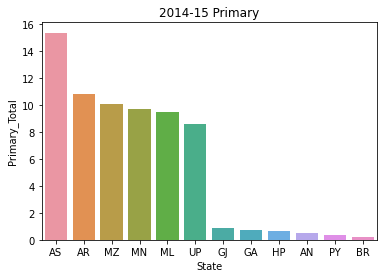

In [ ]:
sns.barplot(x='State', y='Primary_Total', data=ffpu)
plt.title("2014-15 Primary")

In [ ]:
ffup = ff[['State','Upper Primary_Boys','Upper Primary_Girls', 'Upper Primary_Total']]
ffup

,State,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total
2,AN,1.44,1.95,1.695
5,AP,5.09,5.32,5.205
8,AR,5.31,8.08,6.695
11,AS,10.45,10.56,10.505
14,BR,4.14,4.01,4.075
17,CH,0.01,0.96,0.485
20,CG,6.47,5.22,5.845
23,DN,3.70,4.40,4.050
26,DD,3.14,3.07,3.105
29,DL,0.95,0.55,0.750


In [ ]:
ffup = ffup.sort_values(by=('Upper Primary_Total'),ascending = False)
ffup

,State,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total
11,AS,10.45,10.56,10.505
59,MP,7.78,10.70,9.240
47,JH,9.01,8.96,8.985
74,NL,7.87,7.97,7.920
8,AR,5.31,8.08,6.695
35,GJ,4.65,8.54,6.595
68,ML,6.77,6.30,6.535
20,CG,6.47,5.22,5.845
38,HR,5.50,6.18,5.840
44,JK,4.98,5.95,5.465


In [ ]:
ffup = ffup.drop([53,92])

In [ ]:
ffup1 = ffup.head(6)
ffup2 = ffup.tail(6)
ffupT = [ffup1,ffup2]
ffupu = pd.concat(ffupT)

Text(0.5, 1.0, '2014-15 Upper Primary')

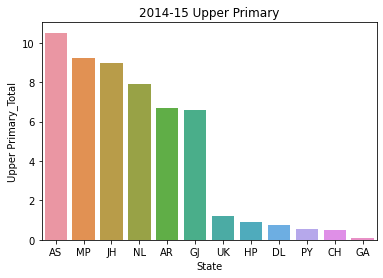

In [ ]:
sns.barplot(x='State', y='Upper Primary_Total', data=ffupu)
plt.title("2014-15 Upper Primary")

In [ ]:
ffs = ff[['State','Secondary _Boys','Secondary _Girls', 'Secondary _Total']]
ffs

,State,Secondary _Boys,Secondary _Girls,Secondary _Total
2,AN,11.47,8.16,9.815
5,AP,15.81,15.60,15.705
8,AR,18.33,15.81,17.070
11,AS,24.64,29.28,26.960
14,BR,25.21,26.62,25.915
17,CH,0.00,0.00,0.000
20,CG,22.62,19.92,21.270
23,DN,18.19,15.08,16.635
26,DD,34.45,29.73,32.090
29,DL,13.55,9.80,11.675


In [ ]:
ffs = ffs.sort_values(by=('Secondary _Total'),ascending = False)
ffs

,State,Secondary _Boys,Secondary _Girls,Secondary _Total
26,DD,34.45,29.73,32.090
77,OD,29.74,29.37,29.555
97,TR,28.03,28.83,28.430
11,AS,24.64,29.28,26.960
50,KA,27.71,24.52,26.115
14,BR,25.21,26.62,25.915
59,MP,23.71,25.97,24.840
35,GJ,26.29,23.24,24.765
47,JH,23.45,24.56,24.005
71,MZ,23.02,20.73,21.875


In [ ]:
ffs = ffs.drop([17])

In [ ]:
ffs1 = ffs.head(6)
ffs2 = ffs.tail(6)
ffsT = [ffs1,ffs2]
ffsu = pd.concat(ffsT)

Text(0.5, 1.0, '2014-15 Secondary')

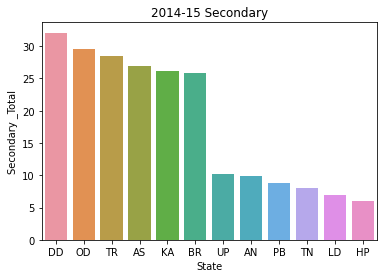

In [ ]:
sns.barplot(x='State', y='Secondary _Total', data=ffsu)
plt.title("2014-15 Secondary")

In [ ]:
ffhs = ff[['State','HrSecondary_Boys','HrSecondary_Girls', 'HrSecondary_Total']]
ffhs

,State,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
2,AN,21.05,12.21,16.630
5,AP,0.00,0.00,0.000
8,AR,19.37,17.44,18.405
11,AS,0.00,0.00,0.000
14,BR,0.00,0.00,0.000
17,CH,12.10,8.41,10.255
20,CG,1.37,4.14,2.755
23,DN,13.45,4.77,9.110
26,DD,44.38,36.05,40.215
29,DL,20.91,13.15,17.030


In [ ]:
ffhs = ffhs.sort_values(by=('HrSecondary_Total'),ascending = False)
ffhs

,State,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
26,DD,44.38,36.05,40.215
8,AR,19.37,17.44,18.405
29,DL,20.91,13.15,17.030
2,AN,21.05,12.21,16.630
32,GA,18.27,9.39,13.830
44,JK,13.85,11.20,12.525
89,SK,12.48,11.17,11.825
17,CH,12.10,8.41,10.255
23,DN,13.45,4.77,9.110
97,TR,8.97,8.89,8.930


In [ ]:
ffhs = ffhs.drop([68,65,86,14,5,11,77])

In [ ]:
ffhs1 = ffhs.head(6)
ffhs2 = ffhs.tail(6)
ffhsT = [ffhs1,ffhs2]
ffhsu = pd.concat(ffhsT)

Text(0.5, 1.0, '2014-15 HrSecondary ')

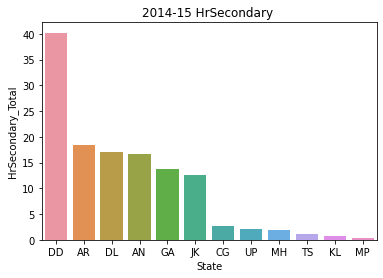

In [ ]:
sns.barplot(x='State', y='HrSecondary_Total', data=ffhsu)
plt.title("2014-15 HrSecondary ")